Fundamentos de ciência de dados - Luiz Davi e Thiago Cavalcanti

In [1]:
from nba_api_jogadores_utils import obter_logs_dos_jogos_por_jogador, obter_estatisticas_de_toda_a_carreira
from constantes_jogadores import TEMPORADA_ATUAL, JOGADOR_1, JOGADOR_2, JOGADOR_3, JOGADOR_1_ID, JOGADOR_2_ID, JOGADOR_3_ID, RESULTADOS_PATH
import pandas as pd
from nba_api_utils import salvar_dataset_csv

# RF10 – O sistema deve apresentar a quantidade de pontos, assistências e rebotes de toda a carreira do jogador e comparada com a atual temporada conforme Tabela 4. 

## Obtendo estatísticas de cada jogador - dados comparativos

In [2]:
def formatar_estatisticas(dados):
    total_de_jogos = dados['GP'].sum() if 'GP' in dados.columns else len(dados)

    total_de_pontos = dados['PTS'].sum()
    media_de_pontos = total_de_pontos / total_de_jogos

    total_de_assistencias = dados['AST'].sum()
    media_de_assistencias =  total_de_assistencias / total_de_jogos

    total_de_rebotes = dados['REB'].sum()
    media_de_rebotes = total_de_rebotes / total_de_jogos

    total_de_minutos = dados['MIN'].sum()
    dados_formatados = {
        'Estatísticas': '',
        'Total de jogos': [total_de_jogos],
        'Média de pontos': [media_de_pontos],
        'Média de assistências': [media_de_assistencias],
        'Média de rebotes': [media_de_rebotes],
        'Minutos em quadra': [total_de_minutos]
    }

    return pd.DataFrame(dados_formatados)

In [3]:
dados_da_temporada_atual_1 = obter_logs_dos_jogos_por_jogador(JOGADOR_1_ID, TEMPORADA_ATUAL)
dados_da_carreira_1 = obter_estatisticas_de_toda_a_carreira(JOGADOR_1_ID)

salvar_dataset_csv(dados_da_carreira_1, f"{RESULTADOS_PATH}/rf10_dados_carreira_{JOGADOR_1_ID}.csv")

estatisticas_temporada_atual_1 = formatar_estatisticas(dados_da_temporada_atual_1)
estatisticas_carreira_1 = formatar_estatisticas(dados_da_carreira_1)

estatisticas_temporada_atual_1['Estatísticas'] = 'Temporada atual'
estatisticas_carreira_1['Estatísticas'] = 'Carreira'

estatisticas_jogador_1 = pd.concat([estatisticas_temporada_atual_1, estatisticas_carreira_1], ignore_index=True)
estatisticas_jogador_1['Nome do jogador'] = JOGADOR_1
estatisticas_jogador_1

,Estatísticas,Total de jogos,Média de pontos,Média de assistências,Média de rebotes,Minutos em quadra,Nome do jogador
0,Temporada atual,43,29.604651,10.302326,12.837209,1566.0,Nikola Jokić
1,Carreira,718,21.465181,7.116992,10.864903,22641.0,Nikola Jokić


In [4]:
dados_da_temporada_atual_2 = obter_logs_dos_jogos_por_jogador(JOGADOR_2_ID, TEMPORADA_ATUAL)
dados_da_carreira_2 = obter_estatisticas_de_toda_a_carreira(JOGADOR_2_ID)

salvar_dataset_csv(dados_da_carreira_2, f"{RESULTADOS_PATH}/rf10_dados_carreira_{JOGADOR_2_ID}.csv")

estatisticas_temporada_atual_2 = formatar_estatisticas(dados_da_temporada_atual_2)
estatisticas_carreira_2 = formatar_estatisticas(dados_da_carreira_2)

estatisticas_temporada_atual_2['Estatísticas'] = 'Temporada atual'
estatisticas_carreira_2['Estatísticas'] = 'Carreira'

estatisticas_jogador_2 = pd.concat([estatisticas_temporada_atual_2, estatisticas_carreira_2], ignore_index=True)
estatisticas_jogador_2['Nome do jogador'] = JOGADOR_2
estatisticas_jogador_2

,Estatísticas,Total de jogos,Média de pontos,Média de assistências,Média de rebotes,Minutos em quadra,Nome do jogador
0,Temporada atual,49,17.979592,2.163265,6.408163,1625.0,Michael Porter Jr.
1,Carreira,317,16.025237,1.343849,6.255521,9067.0,Michael Porter Jr.


In [5]:
dados_da_temporada_atual_3 = obter_logs_dos_jogos_por_jogador(JOGADOR_3_ID, TEMPORADA_ATUAL)
dados_da_carreira_3 = obter_estatisticas_de_toda_a_carreira(JOGADOR_3_ID)

salvar_dataset_csv(dados_da_carreira_3, f"{RESULTADOS_PATH}/rf10_dados_carreira_{JOGADOR_3_ID}.csv")

estatisticas_temporada_atual_3 = formatar_estatisticas(dados_da_temporada_atual_3)
estatisticas_carreira_3 = formatar_estatisticas(dados_da_carreira_3)

estatisticas_temporada_atual_3['Estatísticas'] = 'Temporada atual'
estatisticas_carreira_3['Estatísticas'] = 'Carreira'

estatisticas_jogador_3 = pd.concat([estatisticas_temporada_atual_3, estatisticas_carreira_3], ignore_index=True)
estatisticas_jogador_3['Nome do jogador'] = JOGADOR_3
estatisticas_jogador_3

,Estatísticas,Total de jogos,Média de pontos,Média de assistências,Média de rebotes,Minutos em quadra,Nome do jogador
0,Temporada atual,43,20.395349,6.069767,4.023256,1550.0,Jamal Murray
1,Carreira,512,17.703125,4.623047,3.769531,15927.0,Jamal Murray


In [6]:
estatisticas_jogadores = pd.concat([estatisticas_jogador_1, estatisticas_jogador_2, estatisticas_jogador_3], ignore_index=True)
estatisticas_jogadores

,Estatísticas,Total de jogos,Média de pontos,Média de assistências,Média de rebotes,Minutos em quadra,Nome do jogador
0,Temporada atual,43,29.604651,10.302326,12.837209,1566.0,Nikola Jokić
1,Carreira,718,21.465181,7.116992,10.864903,22641.0,Nikola Jokić
2,Temporada atual,49,17.979592,2.163265,6.408163,1625.0,Michael Porter Jr.
3,Carreira,317,16.025237,1.343849,6.255521,9067.0,Michael Porter Jr.
4,Temporada atual,43,20.395349,6.069767,4.023256,1550.0,Jamal Murray
5,Carreira,512,17.703125,4.623047,3.769531,15927.0,Jamal Murray


In [7]:
salvar_dataset_csv(estatisticas_jogadores, f"{RESULTADOS_PATH}/rf10_comparacao_estatisticas.csv")

# RF10 – Apresentar gráficos de desempenho dos seus jogadores [temporada atual] para compor o Dashboard do projeto: 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [9]:
def exportar_grafico(nome_arquivo):
    caminho_destino = f'{RESULTADOS_PATH}/gráficos'
    os.makedirs(caminho_destino, exist_ok=True)

    caminho_arquivo = os.path.join(caminho_destino, nome_arquivo)
    plt.savefig(caminho_arquivo, dpi=300, bbox_inches='tight')

In [10]:
def gerar_grafico_distribuicao(dados, nome_jogador, estatistica_analisada):
    media = dados.mean()
    mediana = dados.median()

    moda_result = stats.mode(dados, keepdims=True)
    moda = moda_result.mode[0] if moda_result.count[0] > 0 else None

    plt.figure(figsize=(10, 6))
    sns.histplot(dados, kde=True, color='blue', bins=20, label=f'Distribuição de {estatistica_analisada} por jogo')

    plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
    plt.axvline(mediana, color='green', linestyle='-', label=f'Mediana: {mediana:.2f}')
    if moda is not None:
        plt.axvline(moda, color='orange', linestyle=':', label=f'Moda: {moda:.2f}')

    plt.title(f'Distribuição de {estatistica_analisada} por jogo - {nome_jogador}')
    plt.xlabel(f'{estatistica_analisada.capitalize()} por jogo')
    plt.ylabel('Frequência')
    plt.legend()

    exportar_grafico(f'distribuicao_{estatistica_analisada}_{nome_jogador}.png')

    plt.show()

In [11]:
pontos_1 = dados_da_temporada_atual_1['PTS'].dropna()
pontos_2 = dados_da_temporada_atual_2['PTS'].dropna()
pontos_3 = dados_da_temporada_atual_3['PTS'].dropna()

rebotes_1 = dados_da_temporada_atual_1['REB'].dropna()
rebotes_2 = dados_da_temporada_atual_2['REB'].dropna()
rebotes_3 = dados_da_temporada_atual_3['REB'].dropna()

assistencias_1 = dados_da_temporada_atual_1['AST'].dropna()
assistencias_2 = dados_da_temporada_atual_2['AST'].dropna()
assistencias_3 = dados_da_temporada_atual_3['AST'].dropna()

## • Gráfico de distribuição de pontos por jogo em relação a média, mediana e moda

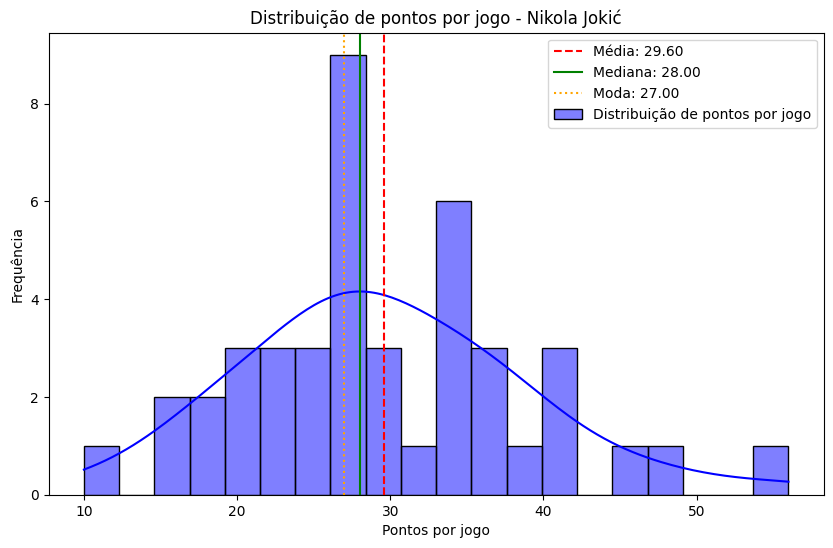

In [12]:
gerar_grafico_distribuicao(pontos_1, JOGADOR_1, 'pontos')

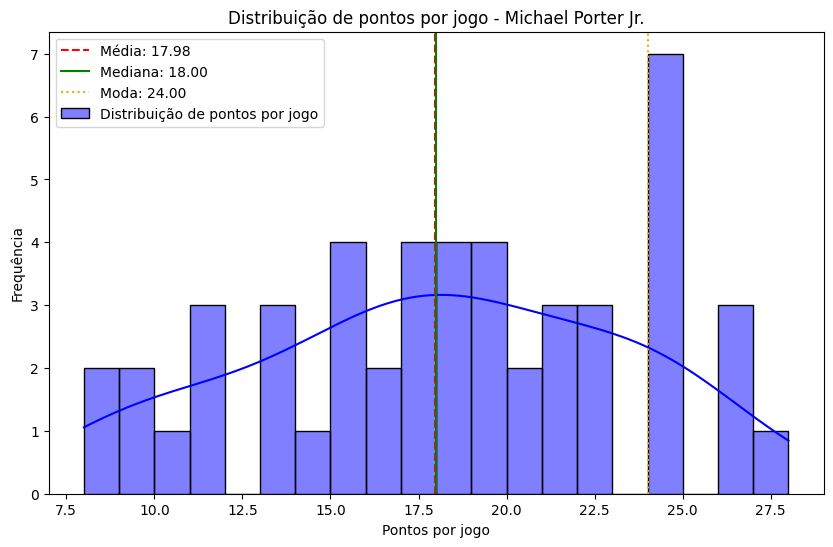

In [13]:
gerar_grafico_distribuicao(pontos_2, JOGADOR_2, 'pontos')

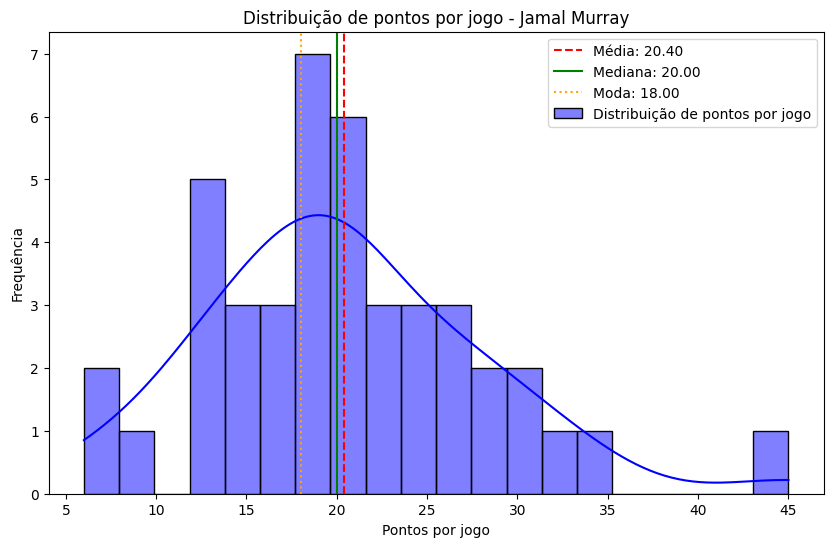

In [14]:
gerar_grafico_distribuicao(pontos_3, JOGADOR_3, 'pontos')

## • Gráfico de distribuição de rebotes por jogo em relação a média, mediana e moda

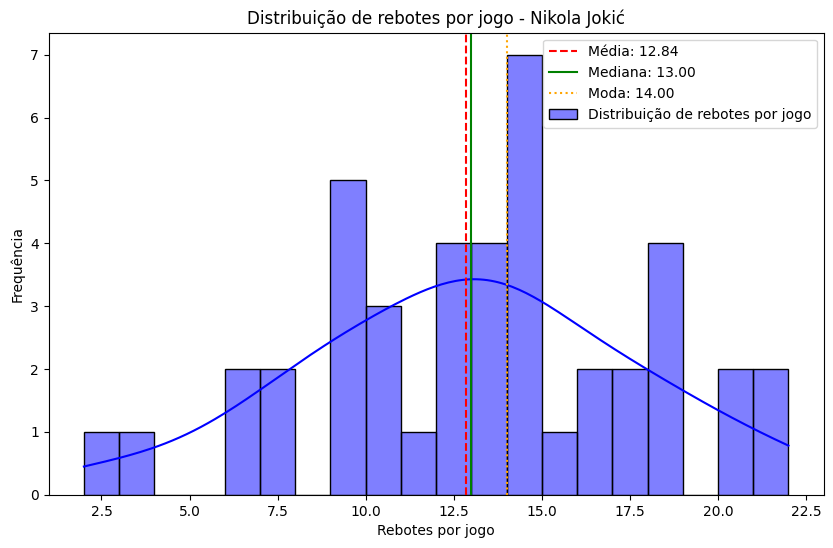

In [15]:
gerar_grafico_distribuicao(rebotes_1, JOGADOR_1, 'rebotes')

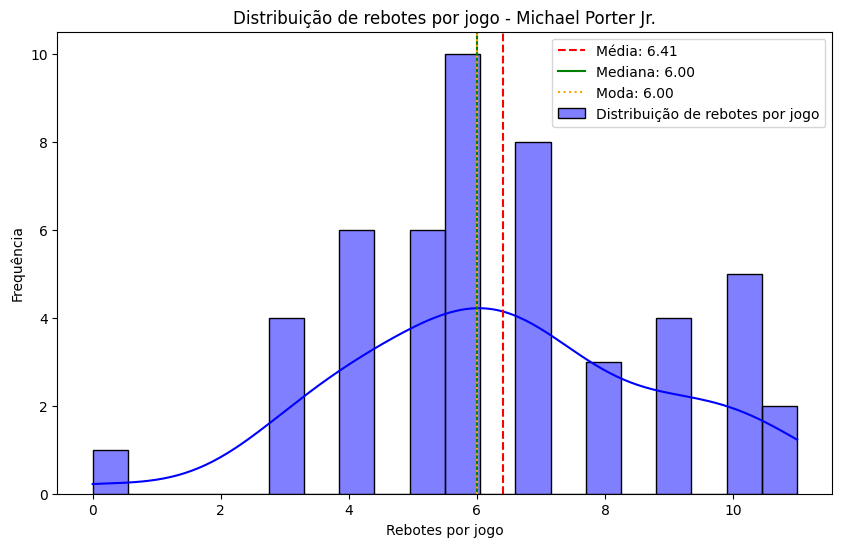

In [16]:
gerar_grafico_distribuicao(rebotes_2, JOGADOR_2, 'rebotes')

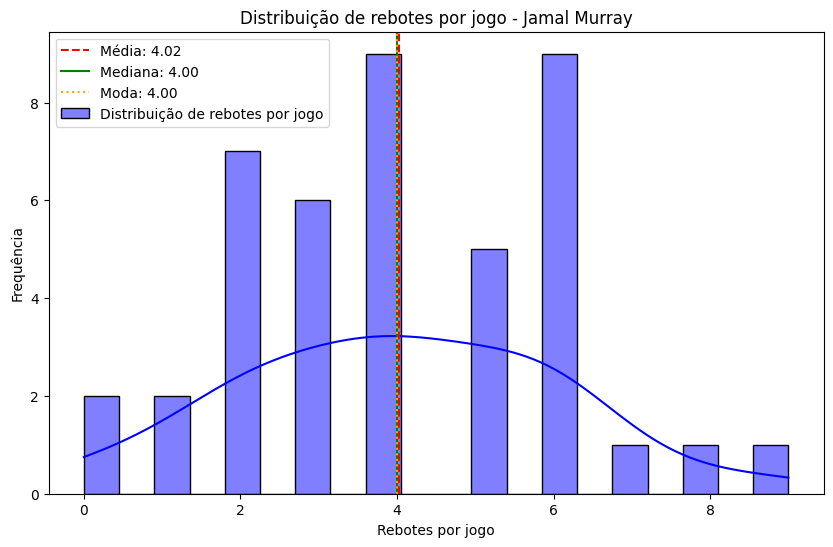

In [17]:
gerar_grafico_distribuicao(rebotes_3, JOGADOR_3, 'rebotes')

## •  Gráfico de distribuição de assistências por jogo em relação a média, mediana e moda 

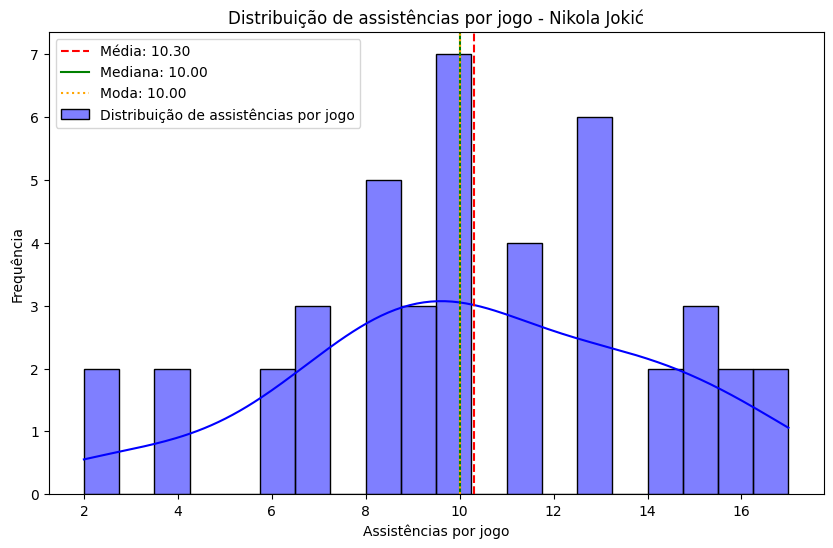

In [18]:
gerar_grafico_distribuicao(assistencias_1, JOGADOR_1, 'assistências')

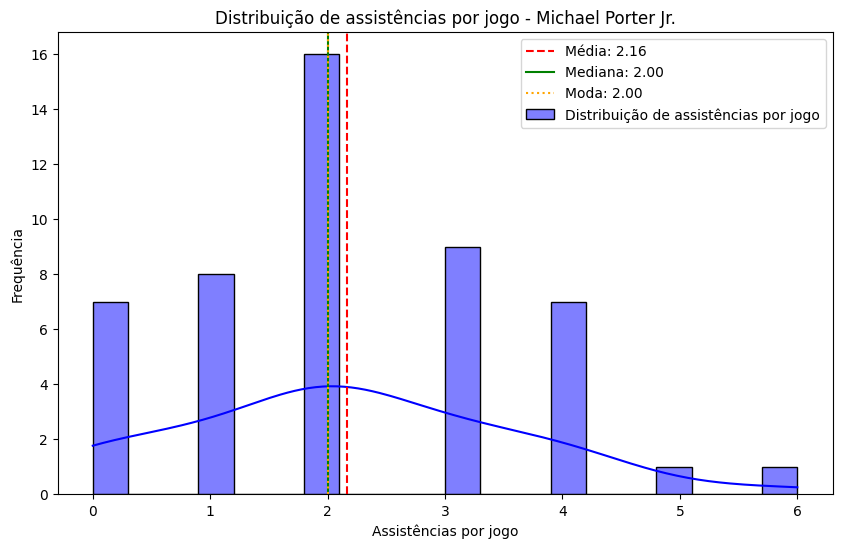

In [19]:
gerar_grafico_distribuicao(assistencias_2, JOGADOR_2, 'assistências')

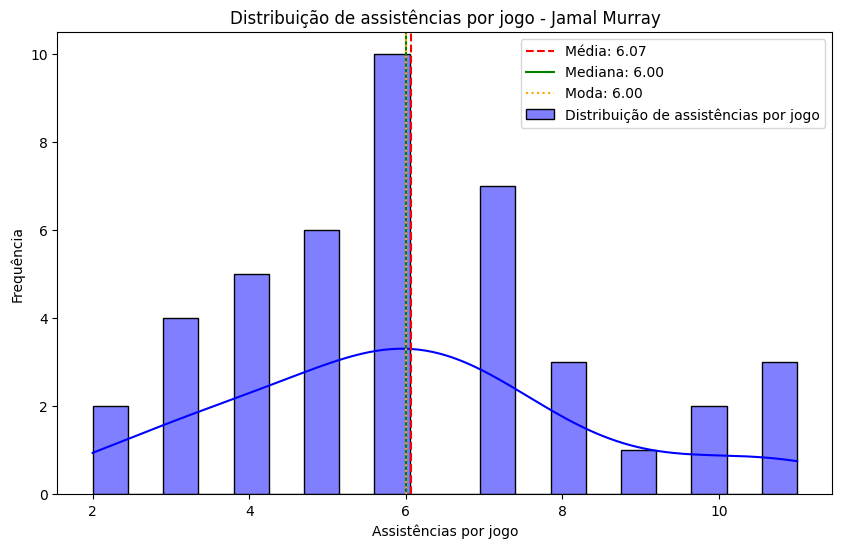

In [20]:
gerar_grafico_distribuicao(assistencias_3, JOGADOR_3, 'assistências')

## •  Gráfico BOX PLOT de pontos, rebotes e assistências por jogo [detalhar todas as informações (Max, Min, Mediana, Outliers, etc.) possíveis nos quartis] 

In [21]:
def gerar_boxplot_estatisticas(dados, nome_jogador):
    plt.figure(figsize=(10, 6))

    df_melted = dados.melt(var_name="Estatística", value_name="Valores")

    box_plot = sns.boxplot(x="Estatística", y="Valores", data=df_melted, hue="Estatística", palette="Set2", showmeans=True, legend=False)

    plt.title(f'Box plot de pontos, rebotes e assistências - {nome_jogador}')
    plt.xlabel('Estatística')
    plt.ylabel('Valores')

    # Calcular estatísticas detalhadas e adicionar ao gráfico
    for i, estatistica in enumerate(dados.columns):
        valores = dados[estatistica].dropna()
        min_val, q1, mediana, q3, max_val = valores.min(), valores.quantile(0.25), valores.median(), valores.quantile(0.75), valores.max()
        media = valores.mean()

        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr
        outliers = valores[(valores < limite_inferior) | (valores > limite_superior)]

        deslocamento_textual = (max_val - min_val) * 0.10

        box_plot.text(i, mediana + deslocamento_textual, f'Mediana: {mediana:.2f}', horizontalalignment='center', color='black', fontsize=9, fontweight='bold')
        box_plot.text(i, media - deslocamento_textual, f'Média: {media:.2f}', horizontalalignment='center', color='blue', fontsize=9, fontweight='bold')

        box_plot.text(i, max_val, f'Max: {max_val:.2f}', horizontalalignment='center', color='red', fontsize=9)
        box_plot.text(i, min_val, f'Min: {min_val:.2f}', horizontalalignment='center', color='green', fontsize=9)


        # Destacar outliers, se houver
        for outlier in outliers:
            box_plot.text(i, outlier - deslocamento_textual, f'Outlier: {outlier:.2f}', horizontalalignment='center', color='purple', fontsize=8, fontweight='bold')

    exportar_grafico(f'box_plot_estatisticas_{nome_jogador}.png')

    plt.show()

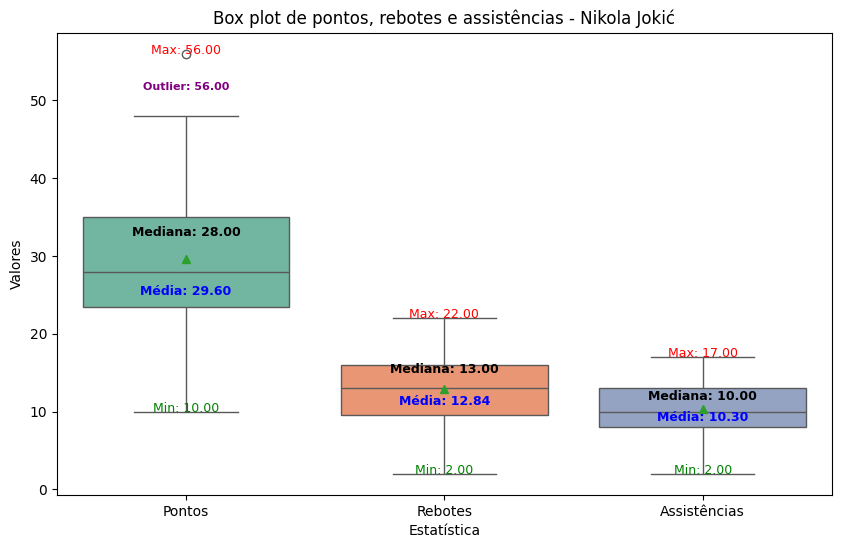

In [22]:
dados_estatisticas_1 = pd.DataFrame({
    'Pontos':pontos_1,
    'Rebotes': rebotes_1,
    'Assistências': assistencias_1
})

gerar_boxplot_estatisticas(dados_estatisticas_1, JOGADOR_1)

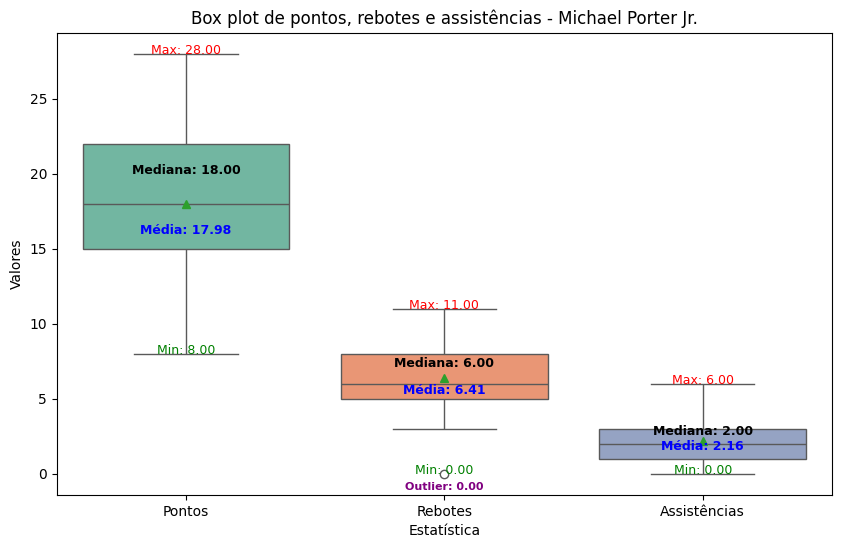

In [23]:
dados_estatisticas_2 = pd.DataFrame({
    'Pontos':pontos_2,
    'Rebotes': rebotes_2,
    'Assistências': assistencias_2
})

gerar_boxplot_estatisticas(dados_estatisticas_2, JOGADOR_2)

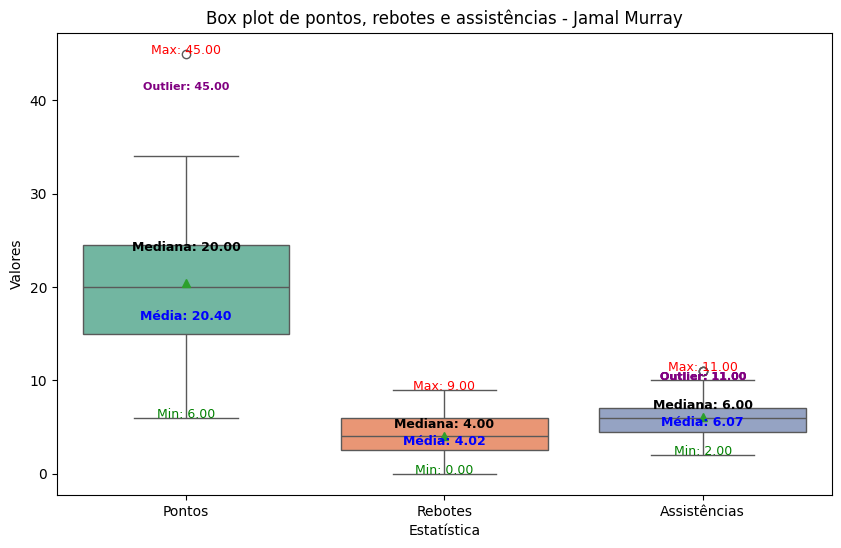

In [24]:
dados_estatisticas_3 = pd.DataFrame({
    'Pontos':pontos_3,
    'Rebotes': rebotes_3,
    'Assistências': assistencias_3
})

gerar_boxplot_estatisticas(dados_estatisticas_3, JOGADOR_3)